In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_original = pd.read_csv('/content/uber.csv')

In [3]:
ds = df_original.copy()

In [4]:
ds.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
ds.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [6]:
ds.dropna(inplace = True)

In [7]:
ds.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [8]:
ds["key"] = pd.to_datetime(ds["key"]).dt.strftime("%H").astype('float32')
ds = ds.rename(columns = {"key" : "time"})
ds.drop(["pickup_datetime"], axis=1, inplace=True)

In [9]:
ds.drop(["Unnamed: 0"], axis=1, inplace=True)

In [10]:
import math

def eucledianDistance(lat1, lon1, lat2, lon2):
  dlat = lat1-lat2
  dlon = lon1-lon2
  dis = math.sqrt(dlat**2 + dlon**2)
  return dis

ds["distance"] = ds.apply(
    lambda row: eucledianDistance(row["pickup_latitude"], row["pickup_longitude"], row["dropoff_latitude"], row["dropoff_longitude"]),
    axis = 1
)


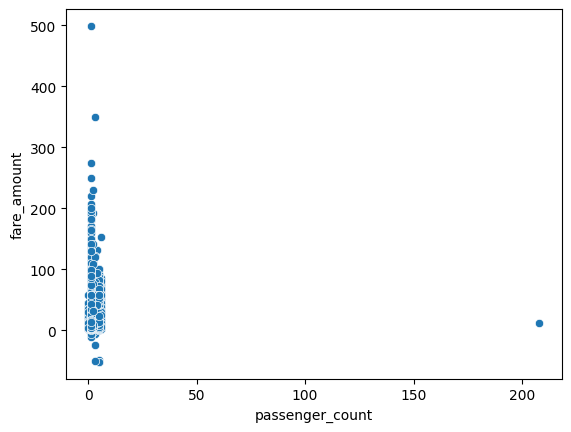

In [12]:
sns.scatterplot(ds, y = "fare_amount", x = "passenger_count")
ds = ds[ds['fare_amount'] < 150]

In [14]:
def remove_outliers(feature):
  global ds
  q3, q1 = np.percentile(ds[feature], [75, 25])
  iqr = q3 - q1;
  ds = ds[(ds[feature] >= q1 - 1.5*iqr) & (ds[feature] <= q3 + iqr*1.5)]

remove_outliers("pickup_latitude")
remove_outliers("pickup_longitude")
remove_outliers("dropoff_latitude")
remove_outliers("dropoff_longitude")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ds.drop("fare_amount", axis = 1)
y = ds["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error, mean_squared_error

print("R2 score", r2_score(y_test, y_pred))
print("Root Mean Sqsuare", root_mean_squared_error(y_test, y_pred))

R2 score 0.14813331010503983
Root Mean Sqsuare 3.2298027037052774


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth = None,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [23]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:

print("R2 score", r2_score(y_test, y_pred))
print("Root Mean Sqsuare", mean_squared_error(y_test, y_pred))